<a href="https://colab.research.google.com/github/RewGuardiano/DevOps/blob/main/Soduku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
def generate_indiviual():
  sudoku = np.zeros((9,9), dtype=int)  # Initialize empty grid
  for i in range(9):
    numbers = list(range(1,10))
    random.shuffle(numbers)
    sudoku[i]= numbers
  return sudoku

In [ ]:
sudoku_grid = generate_indiviual()
print(sudoku_grid)

[[9 5 8 1 6 3 4 7 2]
 [9 7 8 5 1 4 3 2 6]
 [9 6 2 5 3 7 1 8 4]
 [9 6 8 7 2 4 5 1 3]
 [6 9 7 2 5 3 8 1 4]
 [1 9 3 6 2 7 8 4 5]
 [6 3 9 8 4 1 7 2 5]
 [8 5 9 3 1 2 7 6 4]
 [5 1 9 2 7 4 3 8 6]]


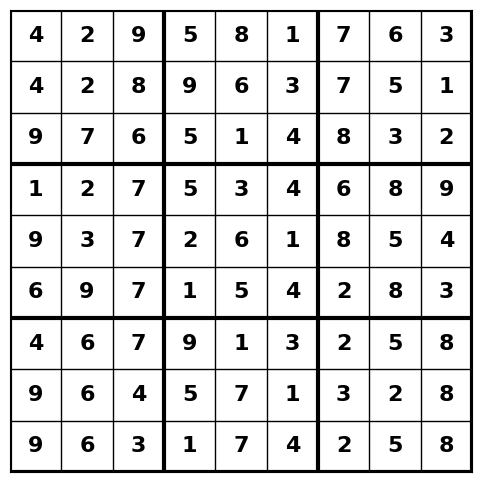

In [ ]:
# Visualize the Sudoku grid with proper alignment
def visualize_sudoku(sudoku):
    fig, ax = plt.subplots(figsize=(6, 6))

    # Ensure equal aspect ratio so that cells are square
    ax.set_aspect("equal")

    # Draw minor grid lines (thin cell borders)
    for i in range(10):
        lw = 1 if i % 3 != 0 else 3  # Thicker lines for 3x3 sub-grid
        ax.plot([i, i], [0, 9], color="black", linewidth=lw)  # Vertical lines
        ax.plot([0, 9], [i, i], color="black", linewidth=lw)  # Horizontal lines

    # Hide axis ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Fill in the numbers
    for i in range(9):
        for j in range(9):
            num = sudoku[i, j]
            if num != 0:
                ax.text(j + 0.5, 8.5 - i, str(num), ha='center', va='center',
                        fontsize=16, fontweight='bold')

    plt.xlim(0, 9)
    plt.ylim(0, 9)
    plt.show()

# Example usage
sudoku_grid = generate_indiviual()  # Generate Sudoku
visualize_sudoku(sudoku_grid)  # Display Sudoku


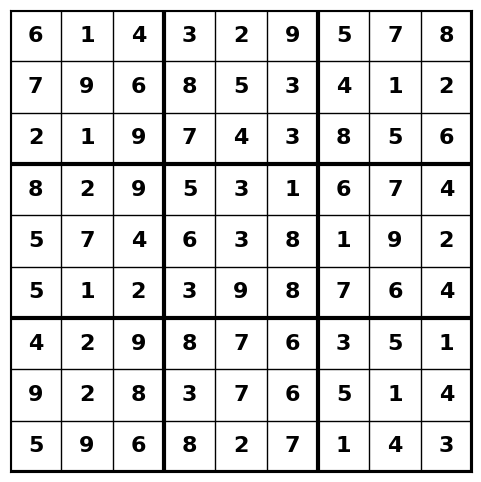

Total cost: 56
Column duplicate indices: [(5, 0), (8, 0), (2, 1), (5, 1), (6, 1), (7, 1), (8, 1), (3, 2), (4, 2), (6, 2), (8, 2), (5, 3), (6, 3), (7, 3), (8, 3), (4, 4), (7, 4), (8, 4), (2, 5), (5, 5), (7, 5), (7, 6), (8, 6), (3, 7), (6, 7), (7, 7), (4, 8), (5, 8), (7, 8)]
Subgrid duplicate indices: [(1, 2), (2, 1), (2, 2), (1, 5), (2, 5), (2, 6), (2, 7), (5, 0), (5, 2), (4, 4), (5, 3), (5, 5), (5, 6), (5, 7), (5, 8), (7, 0), (7, 1), (8, 1), (7, 4), (7, 5), (8, 3), (8, 5), (7, 6), (7, 7), (8, 6), (8, 7), (8, 8)]


In [ ]:
def visualize_sudoku(sudoku):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_aspect("equal")

    # Draw minor grid lines (thin cell borders)
    for i in range(10):
        lw = 1 if i % 3 != 0 else 3  # Thicker lines for 3x3 sub-grid
        ax.plot([i, i], [0, 9], color="black", linewidth=lw)  # Draws Vertical lines
        ax.plot([0, 9], [i, i], color="black", linewidth=lw)  # Draws Horizontal lines

    # Hide axis ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Fill in the numbers
    for i in range(9):
        for j in range(9):
            num = sudoku[i, j]
            if num != 0:
                ax.text(j + 0.5, 8.5 - i, str(num), ha='center', va='center',
                        fontsize=16, fontweight='bold')

    plt.xlim(0, 9)
    plt.ylim(0, 9)
    plt.show()

def check_cost(sudoku):
  #lists
    column_duplicates = []
    subgrid_duplicates = []

    # Check columns
    column_cost = 0
    for col in range(9):
      #dictionary to keep track of numbers already encountered
        seen = {}
        for row in range(9):
            num = sudoku[row, col]
            if num in seen:
                column_duplicates.append((row, col))
                column_cost += 1
            else:
                seen[num] = (row, col) #else stores its indices coordinates if not a duplicate

    # Check 3x3 subgrids
    subgrid_cost = 0
    for box_row in range(3):
        for box_col in range(3):
            seen = {}
            #inner for loops iterate through the cells inside the subgrids
            for i in range(3):
                for j in range(3):
                    row = box_row * 3 + i
                    col = box_col * 3 + j
                    num = sudoku[row, col]
                    if num in seen:
                        subgrid_duplicates.append((row, col))
                        subgrid_cost += 1
                    else:
                        seen[num] = (row, col)

    total_cost = column_cost + subgrid_cost
    return total_cost, column_duplicates, subgrid_duplicates

# Generate a random Sudoku grid
sudoku_grid = generate_indiviual()

# Visualize the Sudoku grid
visualize_sudoku(sudoku_grid)

#calculating cost
cost, column_duplicates, subgrid_duplicates = check_cost(sudoku_grid)
# Print results
print("Total cost:", cost)
if cost == 0:
    print("The Sudoku grid is perfect!")
else:
    print("Column duplicate indices:", column_duplicates)
    print("Subgrid duplicate indices:", subgrid_duplicates)